# Lesson 7
This is about outliers

In [37]:
import pandas as pd
import sys
import matplotlib as plt
%matplotlib inline

In [2]:
print("Python Version"+sys.version)
print("pandas Version"+pd.__version__)

Python Version3.6.3 |Anaconda custom (64-bit)| (default, Nov  8 2017, 18:10:31) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
pandas Version0.21.0


In [6]:
#Createa a dataframe wiith dates 
States=['NY', 'NY', 'NY', 'NY', 'FL', 'FL', 'GA', 'GA', 'FL', 'FL'] 
data=[1.0,2,3,4,5,6,7,8,9,10]
idx=pd.date_range("1/1/2012",periods=10,freq='MS')
df1=pd.DataFrame(data,index=idx,columns=["Revenue"])
df1["State"]=States
df1

,Revenue,State
2012-01-01,1.0,NY
2012-02-01,2.0,NY
2012-03-01,3.0,NY
2012-04-01,4.0,NY
2012-05-01,5.0,FL
2012-06-01,6.0,FL
2012-07-01,7.0,GA
2012-08-01,8.0,GA
2012-09-01,9.0,FL
2012-10-01,10.0,FL


In [8]:
df1.groupby("State").sum()

,Revenue
State,
FL,30.0
GA,15.0
NY,10.0


In [10]:
#Create a second dataframe
data2=[10,10,9,9,8,8,7,7,6,6]
idx2=pd.date_range("1/1/2013",periods=10,freq="MS")
df2=pd.DataFrame(data2,index=idx2,columns=["Revenue"])
df2["State"]=States
df2

,Revenue,State
2013-01-01,10,NY
2013-02-01,10,NY
2013-03-01,9,NY
2013-04-01,9,NY
2013-05-01,8,FL
2013-06-01,8,FL
2013-07-01,7,GA
2013-08-01,7,GA
2013-09-01,6,FL
2013-10-01,6,FL


In [11]:
df2.groupby("State").sum()

,Revenue
State,
FL,28
GA,14
NY,38


In [12]:
df=pd.concat([df1,df2])
df

,Revenue,State
2012-01-01,1.0,NY
2012-02-01,2.0,NY
2012-03-01,3.0,NY
2012-04-01,4.0,NY
2012-05-01,5.0,FL
2012-06-01,6.0,FL
2012-07-01,7.0,GA
2012-08-01,8.0,GA
2012-09-01,9.0,FL
2012-10-01,10.0,FL


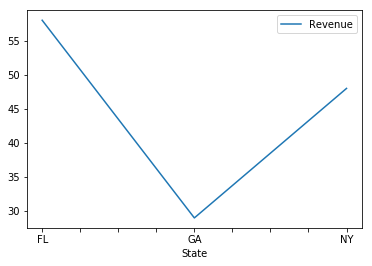

In [19]:
df.groupby("State").sum().plot()

In [20]:
df.groupby("State").sum()

,Revenue
State,
FL,58.0
GA,29.0
NY,48.0


# Ways to calculate outliers
Average and standard deviation are only valid for gaussian distributions

In [24]:
#Method 1 creating by explicitly specifying
#Make a copy of the original df
newdf=df.copy()

newdf['x-Mean']=abs(newdf['Revenue']-newdf['Revenue'].mean())
newdf['1.96*std']=1.96*newdf["Revenue"].std()
newdf['Outlier']=abs((newdf['Revenue'])-newdf['Revenue'].mean())>1.96*newdf["Revenue"].std()

newdf


,Revenue,State,x-Mean,1.96*std,Outlier
2012-01-01,1.0,NY,5.75,5.200273,True
2012-02-01,2.0,NY,4.75,5.200273,False
2012-03-01,3.0,NY,3.75,5.200273,False
2012-04-01,4.0,NY,2.75,5.200273,False
2012-05-01,5.0,FL,1.75,5.200273,False
2012-06-01,6.0,FL,0.75,5.200273,False
2012-07-01,7.0,GA,0.25,5.200273,False
2012-08-01,8.0,GA,1.25,5.200273,False
2012-09-01,9.0,FL,2.25,5.200273,False
2012-10-01,10.0,FL,3.25,5.200273,False


In [34]:
#mthod 2
#group by item

#Make a copy of the original
newdf=df.copy()

State=newdf.groupby("State")

newdf['Outlier']=State.transform(lambda x:abs(x-x.mean())>1.96*x.std())
newdf['x-Mean']=State.transform(lambda x:abs(x-x.mean()))
newdf["1.96*std"]=State.transform(lambda x:1.96*x.std())
newdf

#lambda at this point seems like a a 

,Revenue,State,Outlier,x-Mean,1.96*std
2012-01-01,1.0,NY,False,5.00,7.554813
2012-02-01,2.0,NY,False,4.00,7.554813
2012-03-01,3.0,NY,False,3.00,7.554813
2012-04-01,4.0,NY,False,2.00,7.554813
2012-05-01,5.0,FL,False,2.25,3.434996
2012-06-01,6.0,FL,False,1.25,3.434996
2012-07-01,7.0,GA,False,0.25,0.980000
2012-08-01,8.0,GA,False,0.75,0.980000
2012-09-01,9.0,FL,False,1.75,3.434996
2012-10-01,10.0,FL,False,2.75,3.434996


In [33]:
#Method 3
#Group by item - write a function and then update all 

#Make a copy of the origianl
newdf=df.copy()

State=newdf.groupby("State")

def s(group):
    group['x-Mean']=abs(group["Revenue"]-group["Revenue"].mean())
    group["1.96*std"]=1.96*group["Revenue"].std()
    group["Outlier"]=abs(group['Revenue'] - group['Revenue'].mean()) > 1.96*group['Revenue'].std()
    
    return group

Newdf2=State.apply(s)
Newdf2

,Revenue,State,x-Mean,1.96*std,Outlier
2012-01-01,1.0,NY,5.00,7.554813,False
2012-02-01,2.0,NY,4.00,7.554813,False
2012-03-01,3.0,NY,3.00,7.554813,False
2012-04-01,4.0,NY,2.00,7.554813,False
2012-05-01,5.0,FL,2.25,3.434996,False
2012-06-01,6.0,FL,1.25,3.434996,False
2012-07-01,7.0,GA,0.25,0.980000,False
2012-08-01,8.0,GA,0.75,0.980000,False
2012-09-01,9.0,FL,1.75,3.434996,False
2012-10-01,10.0,FL,2.75,3.434996,False


In [32]:
import ggplot

/anaconda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/anaconda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


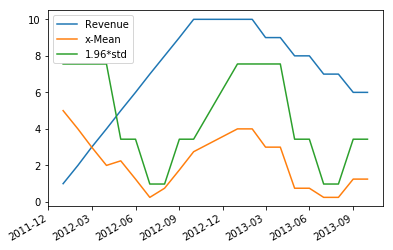

In [35]:
Newdf2.plot()

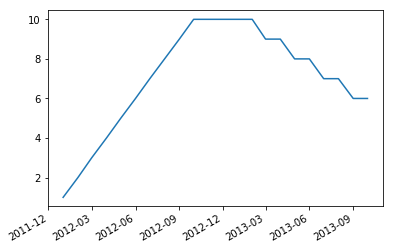

In [36]:
Newdf2["Revenue"].plot()